# Exercício 05
## Planejamento de Experimentos
### Alunos:

- Francielle Alves vargas

---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

## Funções novas utilizadas no exercício

- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)






---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

Dada a introdução acima, já definimos que o tipo do problema é classificação. Defina quais os atributos você utilizará, e a medida de avaliação você acha adequada e explique o porquê dessas escolhas. Você também deve fazer nessa questão os pré-processamentos que achar necessário.

Lembre-se que o objetivo da classificação é fazer predições para dados não vistos, ou seja, quando o algoritmo for colocado em produção ele classificará corretamente amostras não vistas.

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

#converts the sklearn 'cancer' bunch in dataframe data
cancer = load_breast_cancer()
columns = np.append(cancer.feature_names, ["target"])
data = np.c_[cancer.data, cancer.target]
pd.DataFrame(data, columns=columns)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [12]:
#Cria o dataframe
df = pd.DataFrame(data, columns=columns)

#Mostra o dataframe
print(df)

#Verifica se há valores ausentes
print(df.isnull().sum())


     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890     0.0
1          20.57         17.77  ...                  0.08902     0.0
2          19.69         21.25  ...                  0.08758     0.0
3          11.42         20.38  ...                  0.17300     0.0
4          20.29         14.34  ...                  0.07678     0.0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[569 rows x 31 columns]
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
me

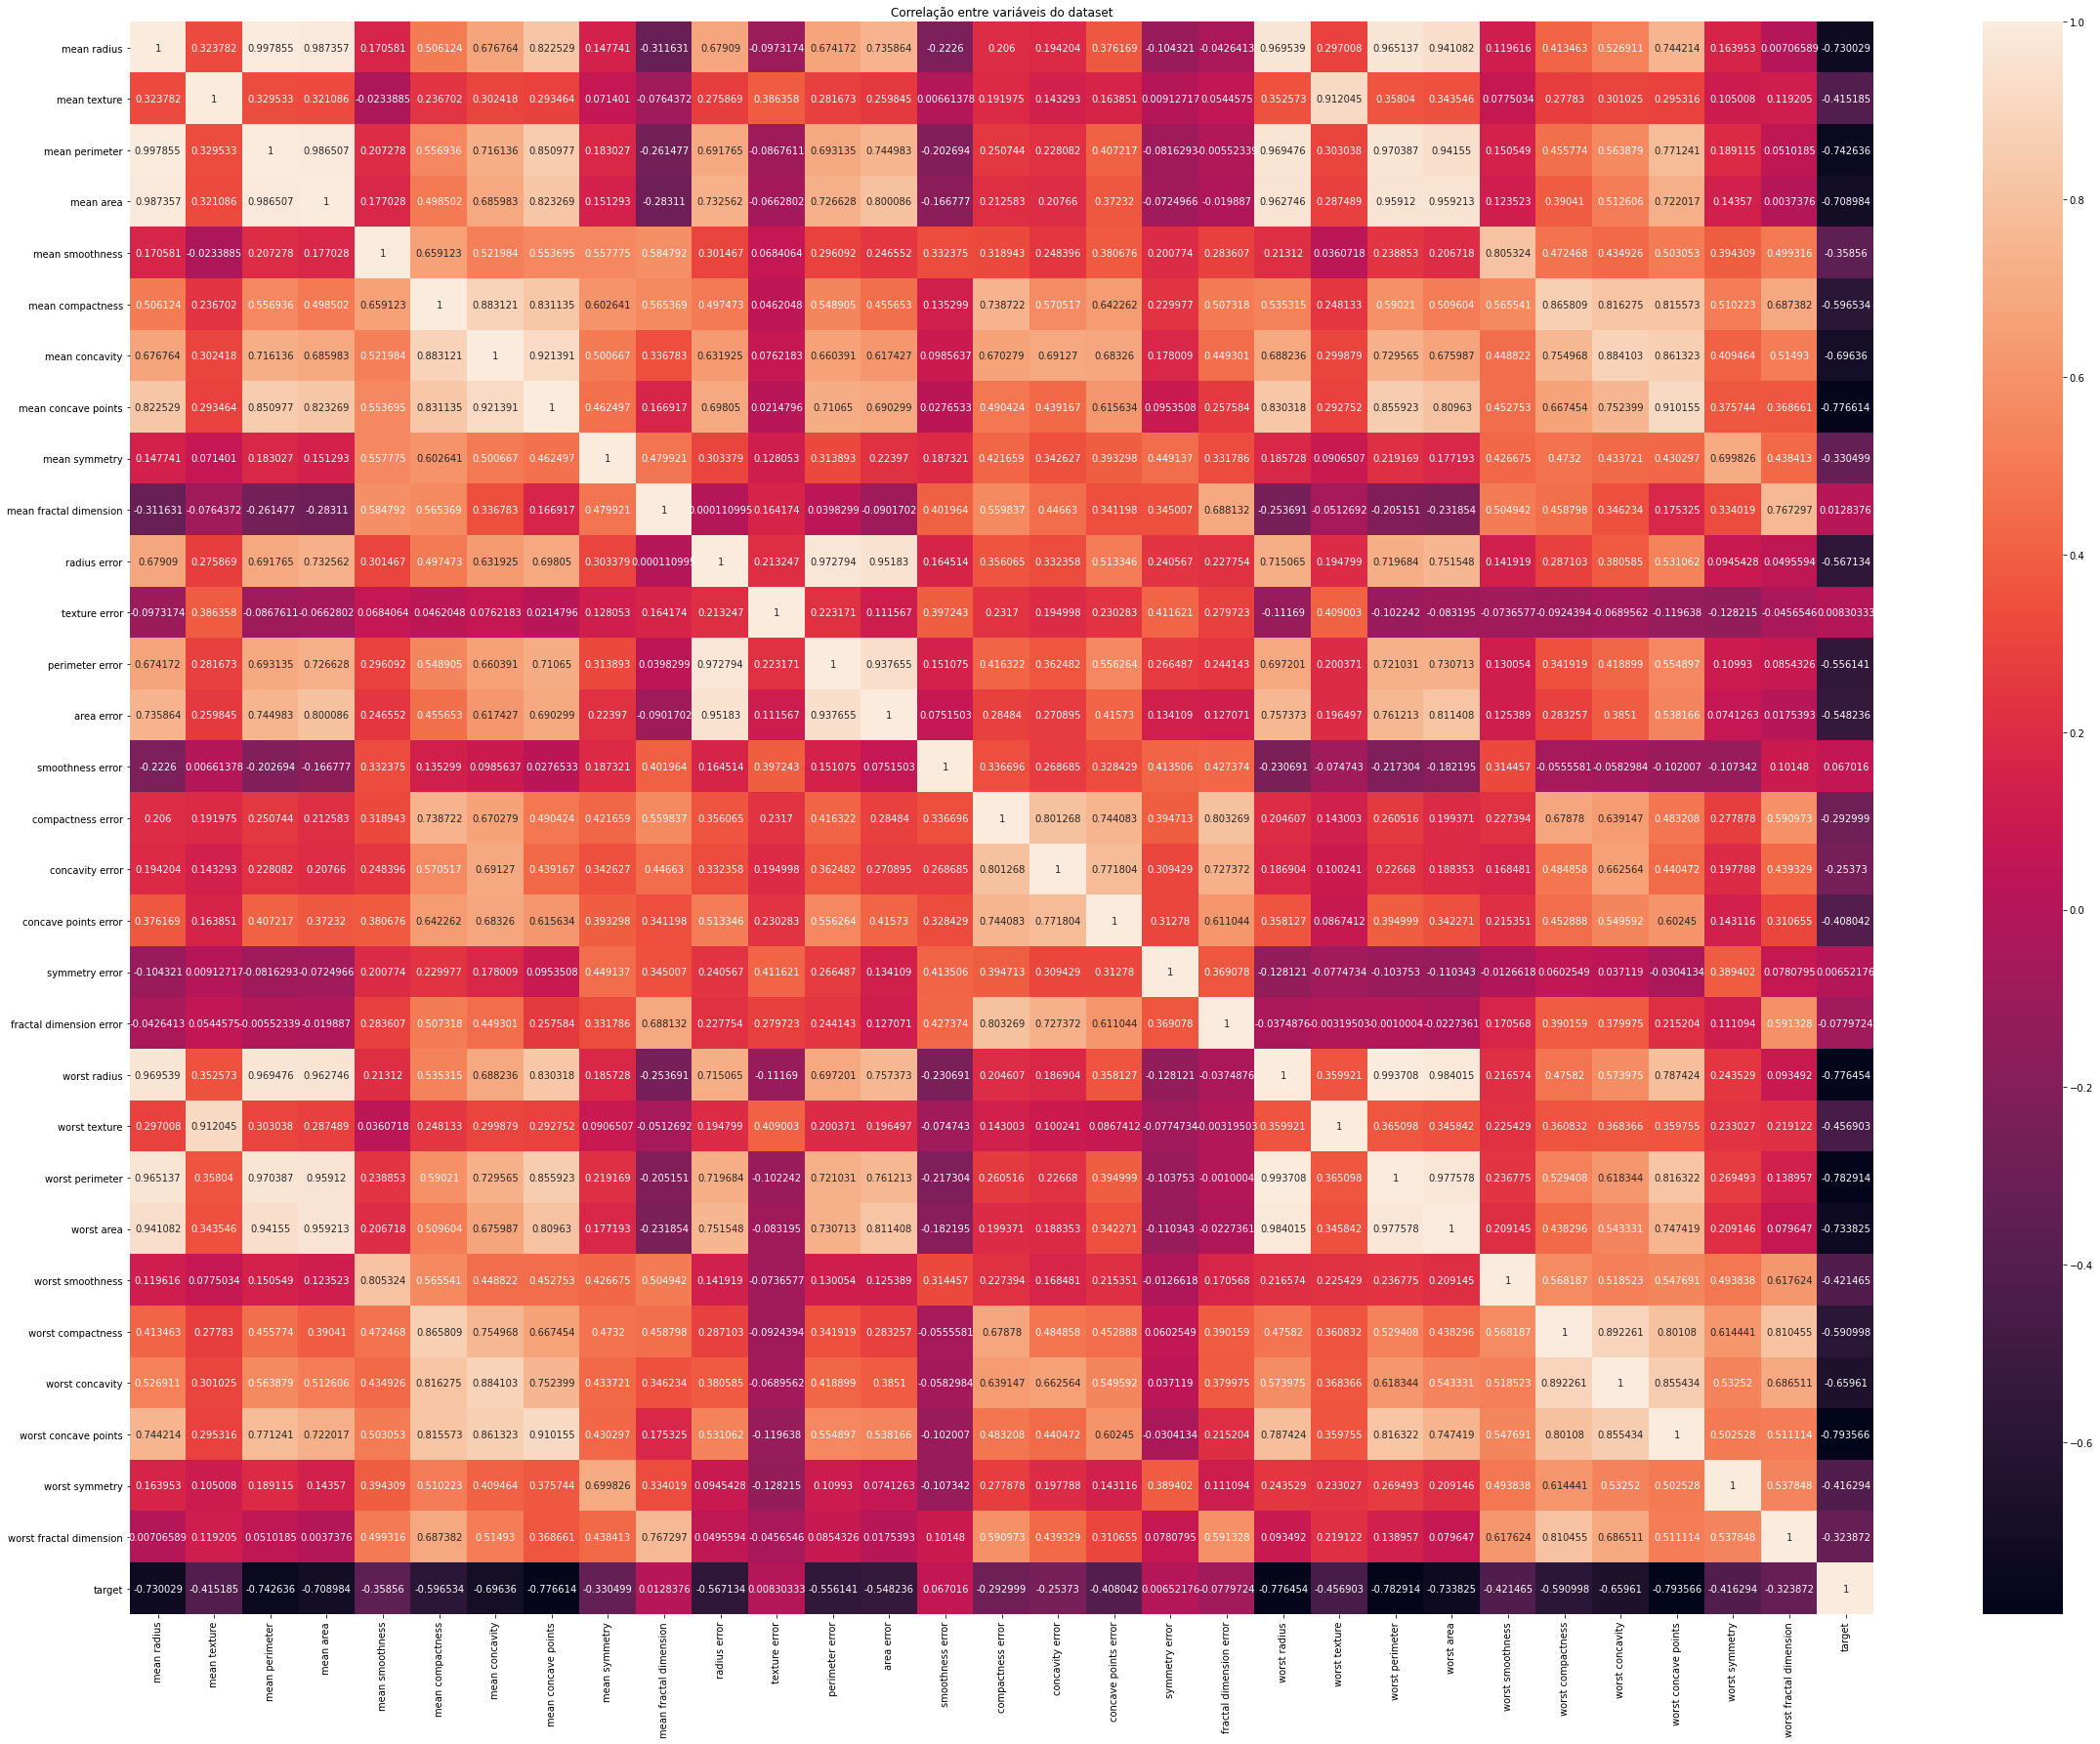

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Calcula correlação usando pearson
corrMatrix = df.corr(method='pearson')
#print(corrMatrix)

#Gera um heatmap
plt.subplots(figsize=(40,30))
sns.heatmap(corrMatrix, annot=True, fmt='g')
plt.title('Correlação entre variáveis do dataset')
plt.show()


Text(0.5, 1.0, 'Importância de cada feature')

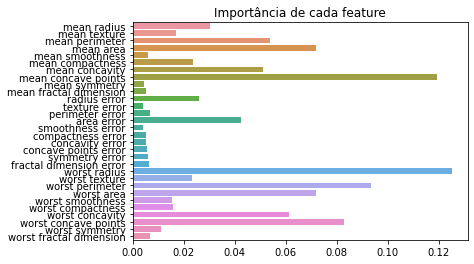

In [14]:
# Mostrando importância de cada feature
X = df.iloc[:, :-1] #atributos
y = df.iloc[:, -1] #classe

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)
model.feature_importances_

importances = pd.Series(data=model.feature_importances_, index=cancer.feature_names)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')


In [15]:
#Seleciona as features com maior score de correlação
aux = model.feature_importances_
df_scorefeatures = pd.DataFrame(aux, columns=['score'])
print('------Estatísticas do array "feature_importance"---------------------------')
print(df_scorefeatures.describe())
print('------Seleção: score maior ou igual a média de valores (mean = 0.033)------')
df_scorefeatures['score'].between(0.033, 0.15, inclusive=False)

------Estatísticas do array "feature_importance"---------------------------
           score
count  30.000000
mean    0.033333
std     0.035914
min     0.003796
25%     0.006031
50%     0.016376
75%     0.053186
max     0.125022
------Seleção: score maior ou igual a média de valores (mean = 0.033)------


0     False
1     False
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22     True
23     True
24    False
25    False
26     True
27     True
28    False
29    False
Name: score, dtype: bool

In [16]:
#Cria um novo dataframe com as features com maior score de correlação + classe
best_features = [
		'mean radius',
		'mean perimeter',
		'mean area',
    'mean concavity',
    'mean concave points',
    'area error',
    'worst radius',
    'worst perimeter',
    'worst area',
    'worst concavity',
    'worst concave points',
    'target'
	]

df_new = pd.DataFrame(df, columns=best_features)
print(df_new)

     mean radius  mean perimeter  ...  worst concave points  target
0          17.99          122.80  ...                0.2654     0.0
1          20.57          132.90  ...                0.1860     0.0
2          19.69          130.00  ...                0.2430     0.0
3          11.42           77.58  ...                0.2575     0.0
4          20.29          135.10  ...                0.1625     0.0
..           ...             ...  ...                   ...     ...
564        21.56          142.00  ...                0.2216     0.0
565        20.13          131.20  ...                0.1628     0.0
566        16.60          108.30  ...                0.1418     0.0
567        20.60          140.10  ...                0.2650     0.0
568         7.76           47.92  ...                0.0000     1.0

[569 rows x 12 columns]


In [17]:
#Distribuição das classes
print('----Antes do balaceamento------')
print(df_new['target'].value_counts())

#Balaceamento das classes
classe_0 = df_new[df_new.target == 0.0]
classe_1 = df_new[df_new.target == 1.0]
sample_1 = classe_1.sample(n=212, replace=False) #replace false quando estamos removendo valores
df_final = pd.concat([sample_1, classe_0])

print('----Depois do balaceamento------')
print(df_final['target'].value_counts())


----Antes do balaceamento------
1.0    357
0.0    212
Name: target, dtype: int64
----Depois do balaceamento------
0.0    212
1.0    212
Name: target, dtype: int64




---

### Questão 02.
Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...), ou da chamada dimensão VC (Vapnik-Chervonenkis) do classificador. A dimensão VC é um tópico mais avançado e faz parte da chamada teoria do aprendizado estatístico, ela é citada aqui apenas como curiosidade não é esperado que saibem sobre isso.

Execute a função *classificacao* definida no notebook com a medida de desempenho que você definiu. Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    #Inicializa estruturas para matrizes de confusão 
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}


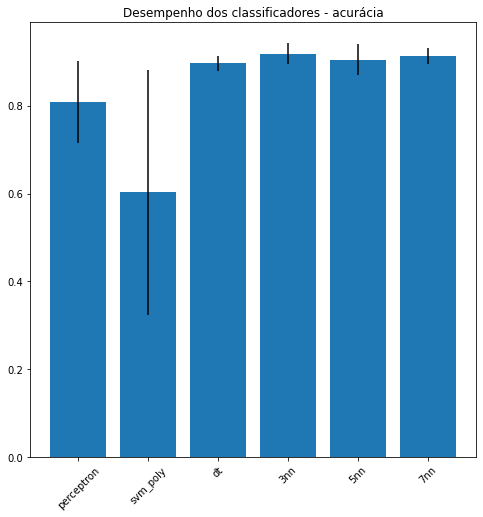

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=4240, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=42,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [18]:
X1_train = [0,1,2,3,4,5,6,7,8,9,10]
yi_train = [11]

classificacao(df_final, X1_train, yi_train)

---

### Questão 03.

Utilizar os 3 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;
- Boostrap (1000 amostras de boostrap).

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Para o 10-fold Cross Validation e o leave-one-out, você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.
  * Já para o boostrap, você vai precisar implementar a função classificação modificada `classificacao_bootstrap`. A seção de interesse que vocês precisarão modificar está destacada na função. No cálculo do bootstrap utilize 80% do dataset para treino e 20% para teste.

Essas execuções podem demorar um pouco, então tenham paciência.

**No material complementar há exemplos de como fazer o bootstrap**

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao_bootstrap(data, columns, target, score=balanced_accuracy_score, no_bs=1000, p_teste=0.2, score_name='acurácia', plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    no_bs:      Número de repetições do bootstrap
    p_teste:    Porcentagem para teste da amostra do bootstrap
    score_name: String. Uma string com o nome da medida de desempenho    
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}


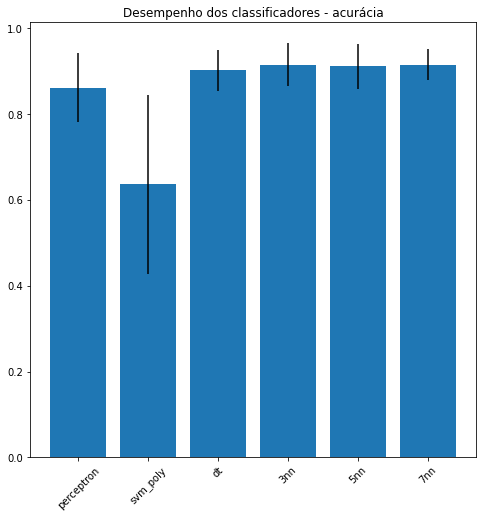

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=4240, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=42,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [20]:
def classificacao2(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    #Inicializa estruturas para matrizes de confusão 
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}


# Classificação usando: 10-fold Cross Validation e o leave-one-out
classificacao2(df_final, X1_train, yi_train)


In [27]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


# Boostrap (1000 amostras de boostrap)
no_exemplos = df.shape[0]
p_treino = 0.8
p_teste = 1 - p_treino
no_bootstrap = 1000

scores = []
for i in range(0, no_bootstrap):
  amostra = df.sample(n = no_exemplos, replace=True) # Obtendo amostra do bootstrap
  
  X = amostra.iloc[:, 0:11] # Separando em dados 
  y = amostra.iloc[:, -1]  # e variável alvo
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p_teste) # Split dos dados

  #data_train = pd.DataFrame(data=np.c_[X_train, y_train], columns= iris['feature_names'] + ['target']) # Criando um dataframe com os dados de treino
  #classe_0 = data_train[data_train['target'] == 0]
  #classe_1 = data_train[data_train['target'] == 1]
  #data_train = pd.concat([classe_0, classe_1.sample(n=80, replace=True)]) # superamostragem


  Xj_train, yj_train = df_final.iloc[:, :-1], df_final.iloc[:, -1] # reatribuição dos dados pra treino (agora superamostrados)

  LR    = LogisticRegression()
  LDA   = LinearDiscriminantAnalysis()
  KNN   = KNeighborsClassifier()
  CART  = DecisionTreeClassifier()
  NB    = GaussianNB()
  SVM   = SVC()

  LR.fit(Xj_train, yj_train)  
  y_pred = LR.predict(X_test)
  scores.append(balanced_accuracy_score(y_test, y_pred))

print("Score do classificador utilizando Bootstrap de tamanho %d: %.2f%%" % (no_bootstrap, np.mean(scores)*100))

Score do classificador utilizando Bootstrap de tamanho 1000: 50.00%




---

### Questão 04.

Utilizando o 10-fold cross validation, calcule as medidas de avaliação baseadas na matriz de confusão (TFP, TFN, TVN, TVP). Como em meio a tantas medidas de avaliação, comparar os classificadores? Como escolher o melhor?

In [38]:
#Separando as features e a class
X = df_final.iloc[:, :-1]
Y = df_final.iloc[:,-1]

validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Cross-validation
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



print('-----------------------SVM Classifier--------------------------')
SVMclassifier = SVC()
SVMclassifier.fit(X_train, Y_train)
predictions = SVMclassifier.predict(X_validation)
print("SVM Accuracy Score: %.2f" % accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


print('-----------------------LR Classifier--------------------------')
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, Y_train)
predictions = LRclassifier.predict(X_validation)
print("LR Accuracy Score: %.2f" % accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


print('-----------------------LDA Classifier--------------------------')
LDAclassifier = LinearDiscriminantAnalysis()
LDAclassifier.fit(X_train, Y_train)
predictions = LDAclassifier.predict(X_validation)
print("LDA Accuracy Score: %.2f" % accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


print('-----------------------KNN Classifier--------------------------')
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, Y_train)
predictions = KNNclassifier.predict(X_validation)
print("KNN Accuracy Score: %.2f" % accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

print('--------------------Decision Tree Classifier-------------------')
CARTclassifier = DecisionTreeClassifier()
CARTclassifier.fit(X_train, Y_train)
predictions = CARTclassifier.predict(X_validation)
print("Decision Tree Accuracy Score: %.2f" % accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

print('--------------------GaussianNB ---------------------------------')
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, Y_train)
predictions = NBclassifier.predict(X_validation)
print("GaussianNB Accuracy Score: %.2f" % accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


LR: 0.947571 (0.040642)
LDA: 0.957962 (0.017518)
KNN: 0.913360 (0.023759)
CART: 0.931781 (0.041059)
NB: 0.905466 (0.033801)
SVM: 0.902767 (0.035577)
-----------------------SVM Classifier--------------------------
SVM Accuracy Score: 0.86
[[18  5]
 [ 1 19]]
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86        23
         1.0       0.79      0.95      0.86        20

    accuracy                           0.86        43
   macro avg       0.87      0.87      0.86        43
weighted avg       0.87      0.86      0.86        43

-----------------------LR Classifier--------------------------
LR Accuracy Score: 0.86
[[18  5]
 [ 1 19]]
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86        23
         1.0       0.79      0.95      0.86        20

    accuracy                           0.86        43
   macro avg       0.87      0.87      0.86        43
weighted avg       0.87      0.86     